## **Análisis de Sistemas Térmicos usando Python**

In [ ]:
pip install Coolprop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
pip install beautifultable

Note: you may need to restart the kernel to use updated packages.


In [9]:
import CoolProp.CoolProp as cp
import numpy as np

Para este ejemplo nuevamente consideramos **Agua** como substancia de trabajo.

Definiremos como Temperatura de referencia 298 K y Presión de referenica 1 atmósfera: 101,325 kPa

In [6]:
fluid = "water"
ref_temp = 298 # K
ref_press = 101325 # Pa

En este ejemplo, evaluaremos el proceso de vaporización de agua a 1 atm

Evaluaremos el estado inicial a condiciones ambientales (0), seguirdo por una adicion de calor hasta el estado de líquido saturado (1), luego evaluaremos el estdo de vapor saturado (2) y finalmente evaluaremos el estado de vapor sobre calentado a 200°C, donde todos los estados anteriores se mantienen a 1 atm.

In [47]:
T,P, h,D =np.empty(4),np.empty(4),np.empty(4),np.empty(4)
Estado = []

Estado 0

In [48]:
Estado.append('Ambente') 
T[0] = ref_temp
P[0] = ref_press

h[0] = cp.PropsSI('H', 'T', T[0], 'P', P[0], fluid)
D[0] = cp.PropsSI('D', 'T', T[0], 'P', P[0], fluid)

Estado 1 - Líquido Saturado

In [49]:
Estado.append('L. Saturado') 
P[1] = ref_press

T[1] = cp.PropsSI('T', 'Q', 0, 'P', P[1], fluid)
h[1] = cp.PropsSI('H', 'Q', 0, 'P', P[1], fluid)
D[1] = cp.PropsSI('D', 'Q', 0, 'P', P[1], fluid)

Estado 2 -  Vapor Saturado

In [50]:
Estado.append('V. Saturado') 
P[2] = ref_press

T[2] = cp.PropsSI('T', 'Q', 1, 'P', P[2], fluid)
h[2] = cp.PropsSI('H', 'Q', 1, 'P', P[2], fluid)
D[2] = cp.PropsSI('D', 'Q', 1, 'P', P[2], fluid)

Estado 3 - Vapor Sobrecalentado a 200°C

In [51]:
Estado.append('Sobrecalentado') 
T[3] = 200 + 273.15 # K
P[3] = ref_press

h[3] = cp.PropsSI('H', 'T', T[3], 'P', P[3], fluid)
D[3] = cp.PropsSI('D', 'T', T[3], 'P', P[3], fluid)

Crearemos una Tabla de resumen de los estados termodinámicos

In [52]:
from beautifultable import BeautifulTable as bt

In [57]:
print('Estados termodinámicos ' + fluid)
table = bt()
table = bt(maxwidth=100)
table.columns.append(T, header="Temperatura\n[C]")
table.columns.append(P/1000, header="Presión\n[kPa]")
table.columns.append(h/1000, header="Entalpía\n[kJ/kg]")
table.columns.append(D, header="Densidad \n[kg/m3]")
table.rows.header = Estado
print(table)

Estados termodinámicos water
+----------------+-------------+---------+----------+-----------+
|                | Temperatura | Presión | Entalpía | Densidad  |
|                |     [C]     |  [kPa]  | [kJ/kg]  |  [kg/m3]  |
+----------------+-------------+---------+----------+-----------+
|    Ambente     |    298.0    | 101.325 | 104.293  |  997.086  |
+----------------+-------------+---------+----------+-----------+
|  L. Saturado   |   373.124   | 101.325 | 419.058  |  958.367  |
+----------------+-------------+---------+----------+-----------+
|  V. Saturado   |   373.124   | 101.325 | 2675.529 |   0.598   |
+----------------+-------------+---------+----------+-----------+
| Sobrecalentado |   473.15    | 101.325 | 2875.389 |   0.466   |
+----------------+-------------+---------+----------+-----------+


c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
c:\Users\jmcar\anaconda3\envs\Thermodynamics\lib\site-packages\CoolProp\Plots\Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


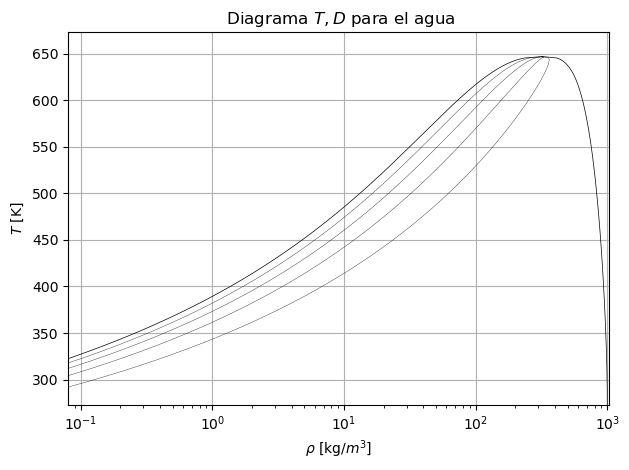

In [55]:
from CoolProp.Plots import PropertyPlot

td_plot = PropertyPlot('Water', 'TD', tp_limits='ORC', unit_system='KSI')
td_plot.calc_isolines(cp.iQ, num=6)
td_plot.title(r' Diagrama $T,D$ para el agua')
td_plot.xlabel(r'$\rho$ [kg/$m^3$]')
td_plot.ylabel(r'$T$ [K]')
td_plot.grid()
td_plot.show()